# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 설정
%matplotlib inline

# 폰트 선명하게 보이게 설정
set_matplotlib_formats('retina')

# 데이터 불러오기

In [34]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

# Q1. 
```
시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

1. 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
2. describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 
    아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
3. 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니
    데이터가 수치 형태로 되어 있는지도 확인해 주세요!
4. 데이터는 위에서 제공된 데이터를 사용합니다.
5. 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!
```
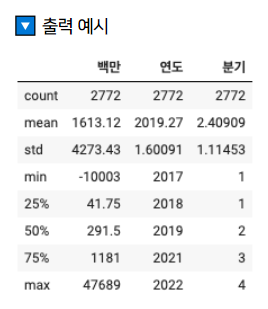

## 컬럼 이름 변경

In [51]:
df = df.rename(columns={"데이터":"백만"})

df

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


## 연도, 분기 컬럼 생성

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [52]:
df["연도"] = df["시점"].map(lambda x: x.split(".")[0]).astype(int)
df["분기"] = df["시점"].map(lambda x: x.split(".")[1].split("/")[0]).astype(int)

In [53]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
1102,아세안(ASEAN),화장품,면세점 이외,2017.3/4,-10003,2017,3


## 정리
- 백만 컬럼에 이상치(-10003) 존재
- 백만 컬럼의 중위값과 최댓값의 차이가 큼
    - 분위 끝단의 값이 큰 것을 확인할 수 있음

# Q2. 
```
pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

1. 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
2. pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
3. 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.
```
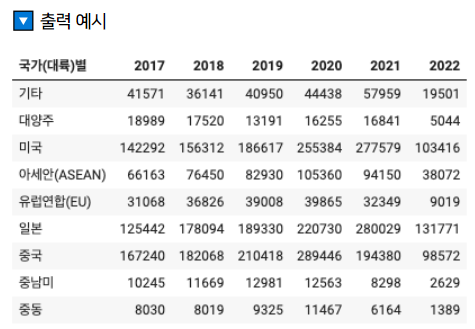

## 이상치 제거

In [56]:
df = df[df["백만"] > 0]

## pivot_table()

In [57]:
df_total = df.pivot_table(aggfunc="sum", values="백만", index="국가(대륙)별", columns="연도")

df_total

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),76166,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


## 시각화

In [58]:
df_total = df_total.T

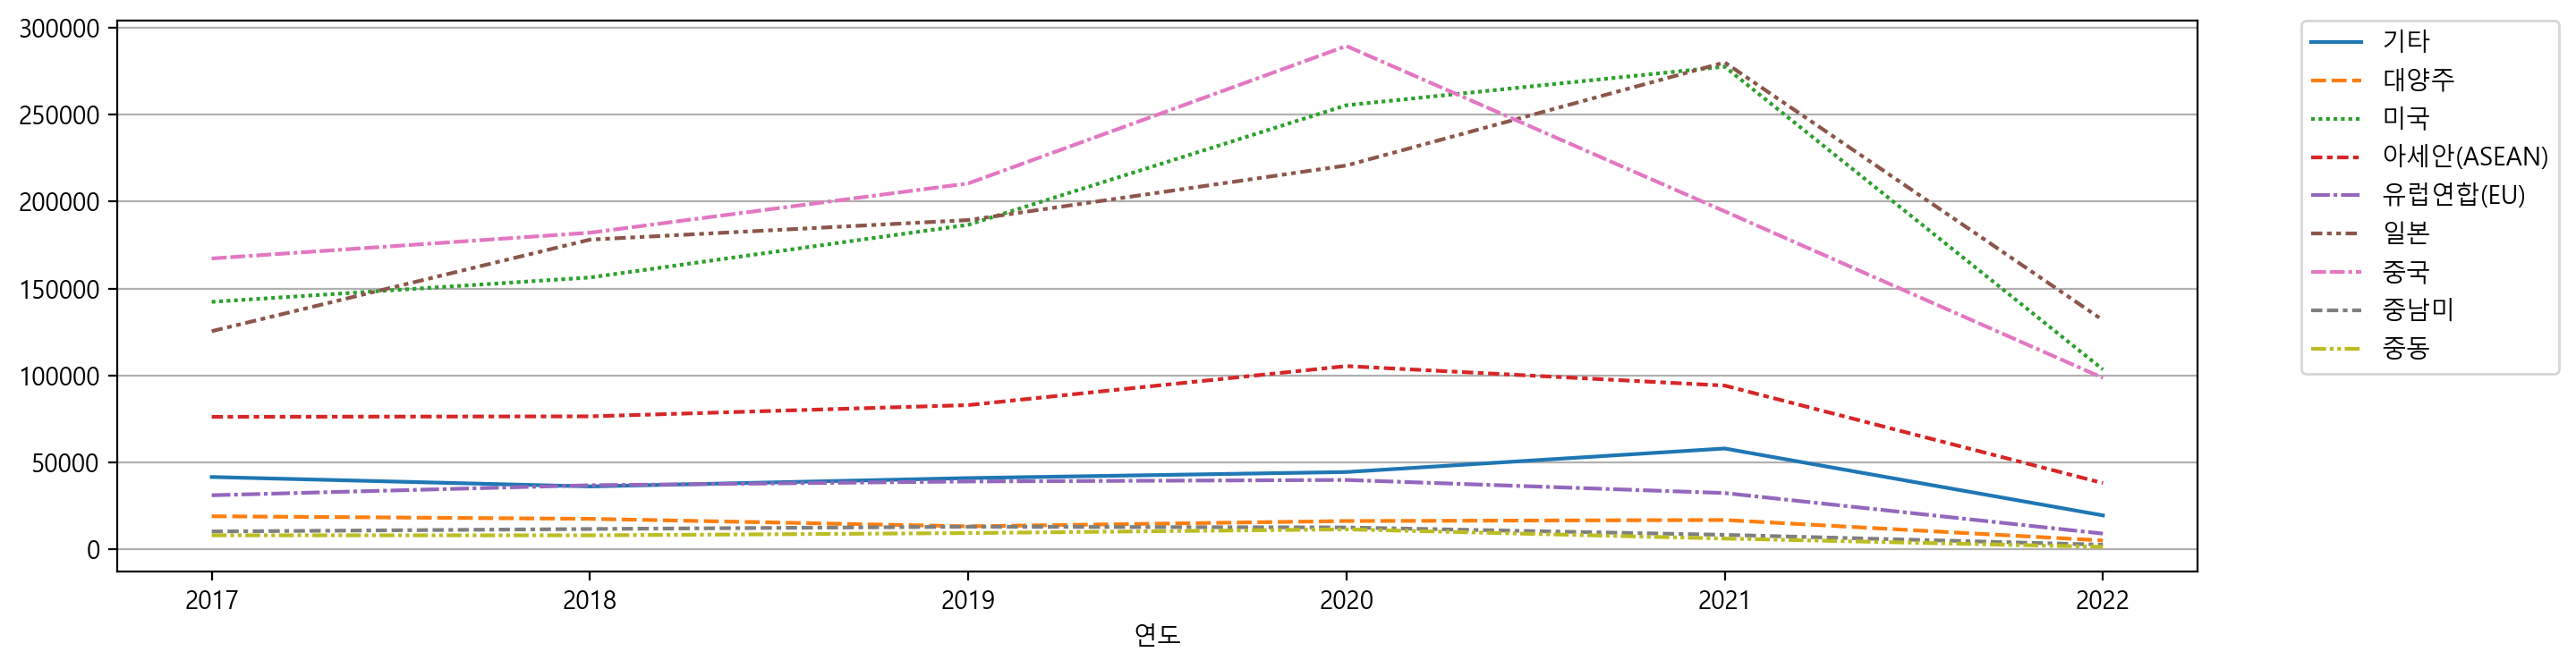

In [59]:
plt.figure(figsize = (15, 4))

sns.lineplot(data=df_total)

plt.grid(axis = "y")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# Q3. 
```
groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 

1. 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 
    합계를 구하고 분석해 주세요! 
2. 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
    그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.
```

In [33]:
df["판매유형별"].unique()

array(['면세점 이외'], dtype=object)

## groupby()

In [60]:
df_2020 = df[df["연도"] == 2020].copy()

df_2020

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [93]:
df_2020_sum = df_2020.groupby(["국가(대륙)별"])[["백만"]].sum().sort_values(by="백만", ascending=False)

country_list = df_2020_sum.index

In [88]:
df_2020_item = df_2020.groupby(["국가(대륙)별", "상품군별"])[["백만"]].sum()

df_2020_item = df_2020_item.reset_index()

df_2020_item

,국가(대륙)별,상품군별,백만
0,기타,가전·전자·통신기기,1716
1,기타,기 타,3345
2,기타,농축수산물,9
3,기타,사무·문구,187
4,기타,생활용품 및 자동차용품,1464
...,...,...,...
118,중동,음·식료품,927
119,중동,음반·비디오·악기,3250
120,중동,의류 및 패션 관련상품,1776
121,중동,컴퓨터 및 주변기기,388


## 시각화

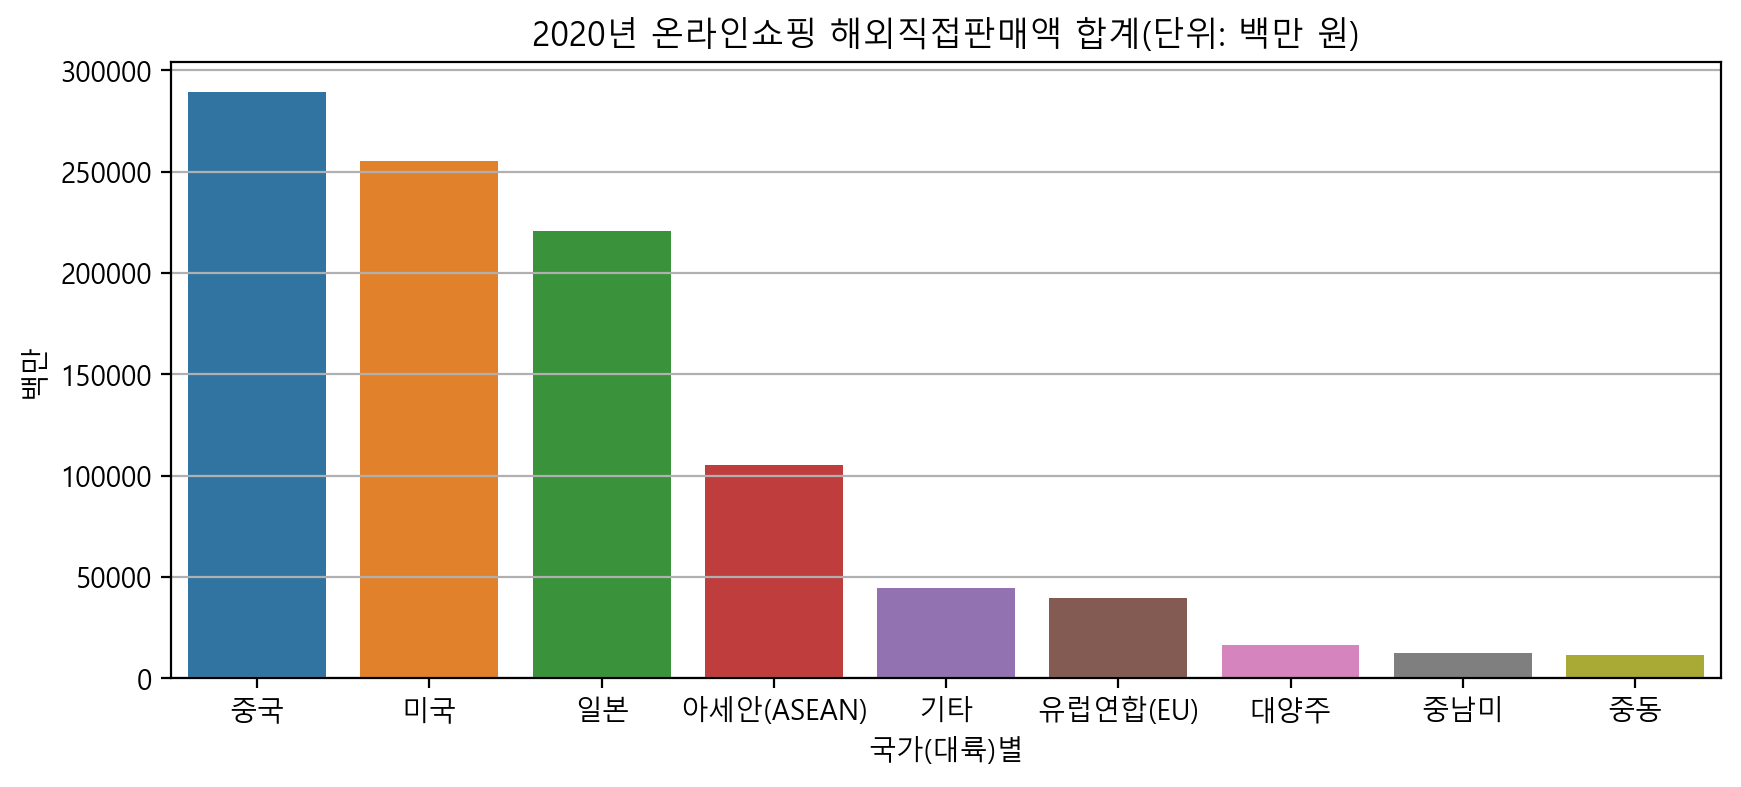

In [62]:
plt.figure(figsize=(10, 4))

sns.barplot(data=df_2020_sum, x = df_2020_sum.index, y = "백만")

plt.grid(axis = "y")
plt.title("2020년 온라인쇼핑 해외직접판매액 합계(단위: 백만 원)")

plt.show()

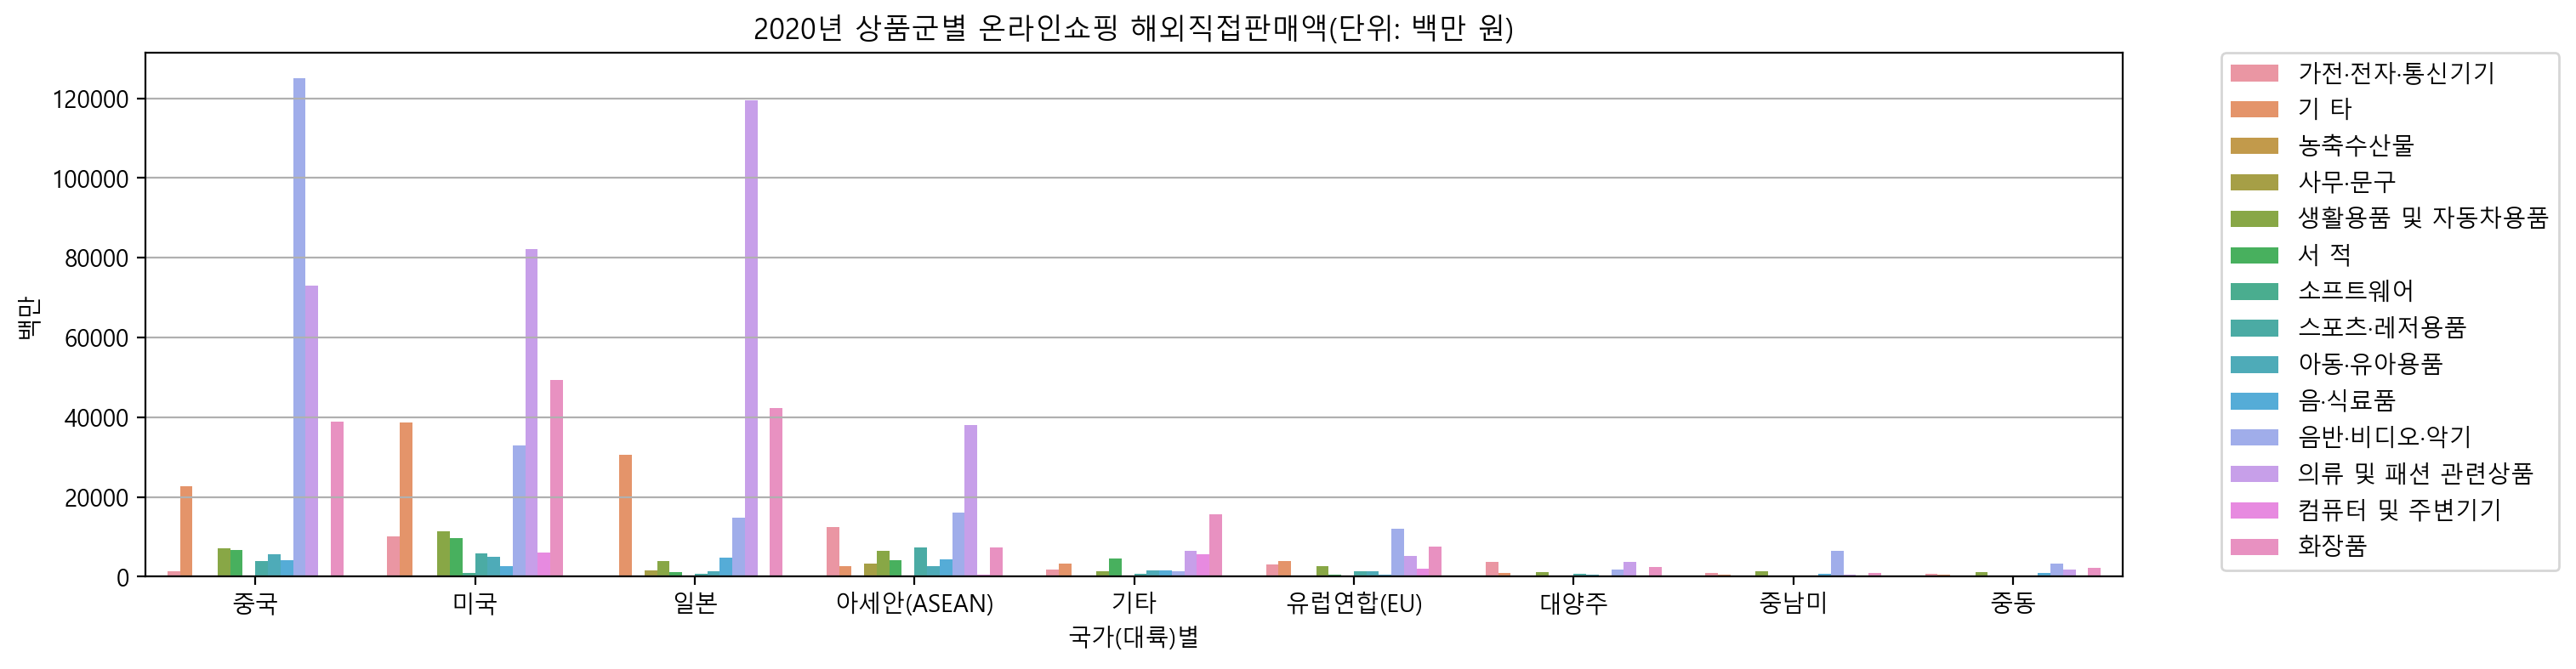

In [96]:
plt.figure(figsize=(15, 4))

sns.barplot(data=df_2020_item, x = "국가(대륙)별", y = "백만", hue = "상품군별", order=country_list)

plt.grid(axis = "y")
plt.title("2020년 상품군별 온라인쇼핑 해외직접판매액(단위: 백만 원)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## 인사이트
- 해외직접판매액의 합계는 중국, 미국, 일본 순으로 많았음
- 상품군별 해외직접판매액을 분석했을 때 국가별로 많이 판매되는 상품군이 상이함을 확인 할 수 있음

# Q4. 
```
주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

1. 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 
    "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 
2. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
3. 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
```
 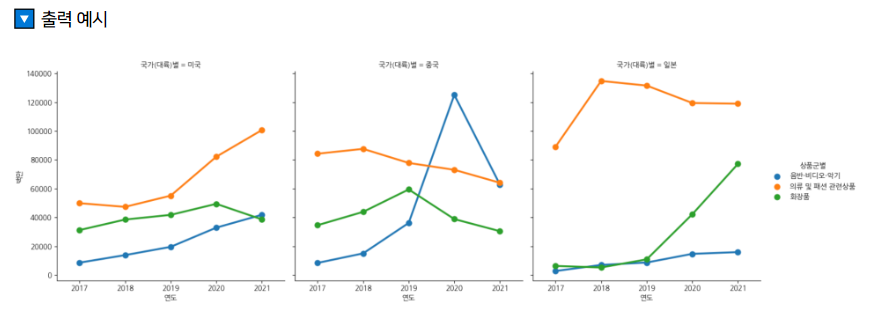

## 데이터 필터링

In [106]:
df_main = df[(df["국가(대륙)별"].isin(["미국", "중국", "일본"])) & (df["상품군별"].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])) & (df["연도"] <= 2021)].copy()

In [107]:
df_main

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


## 시각화

<Figure size 1000x800 with 0 Axes>

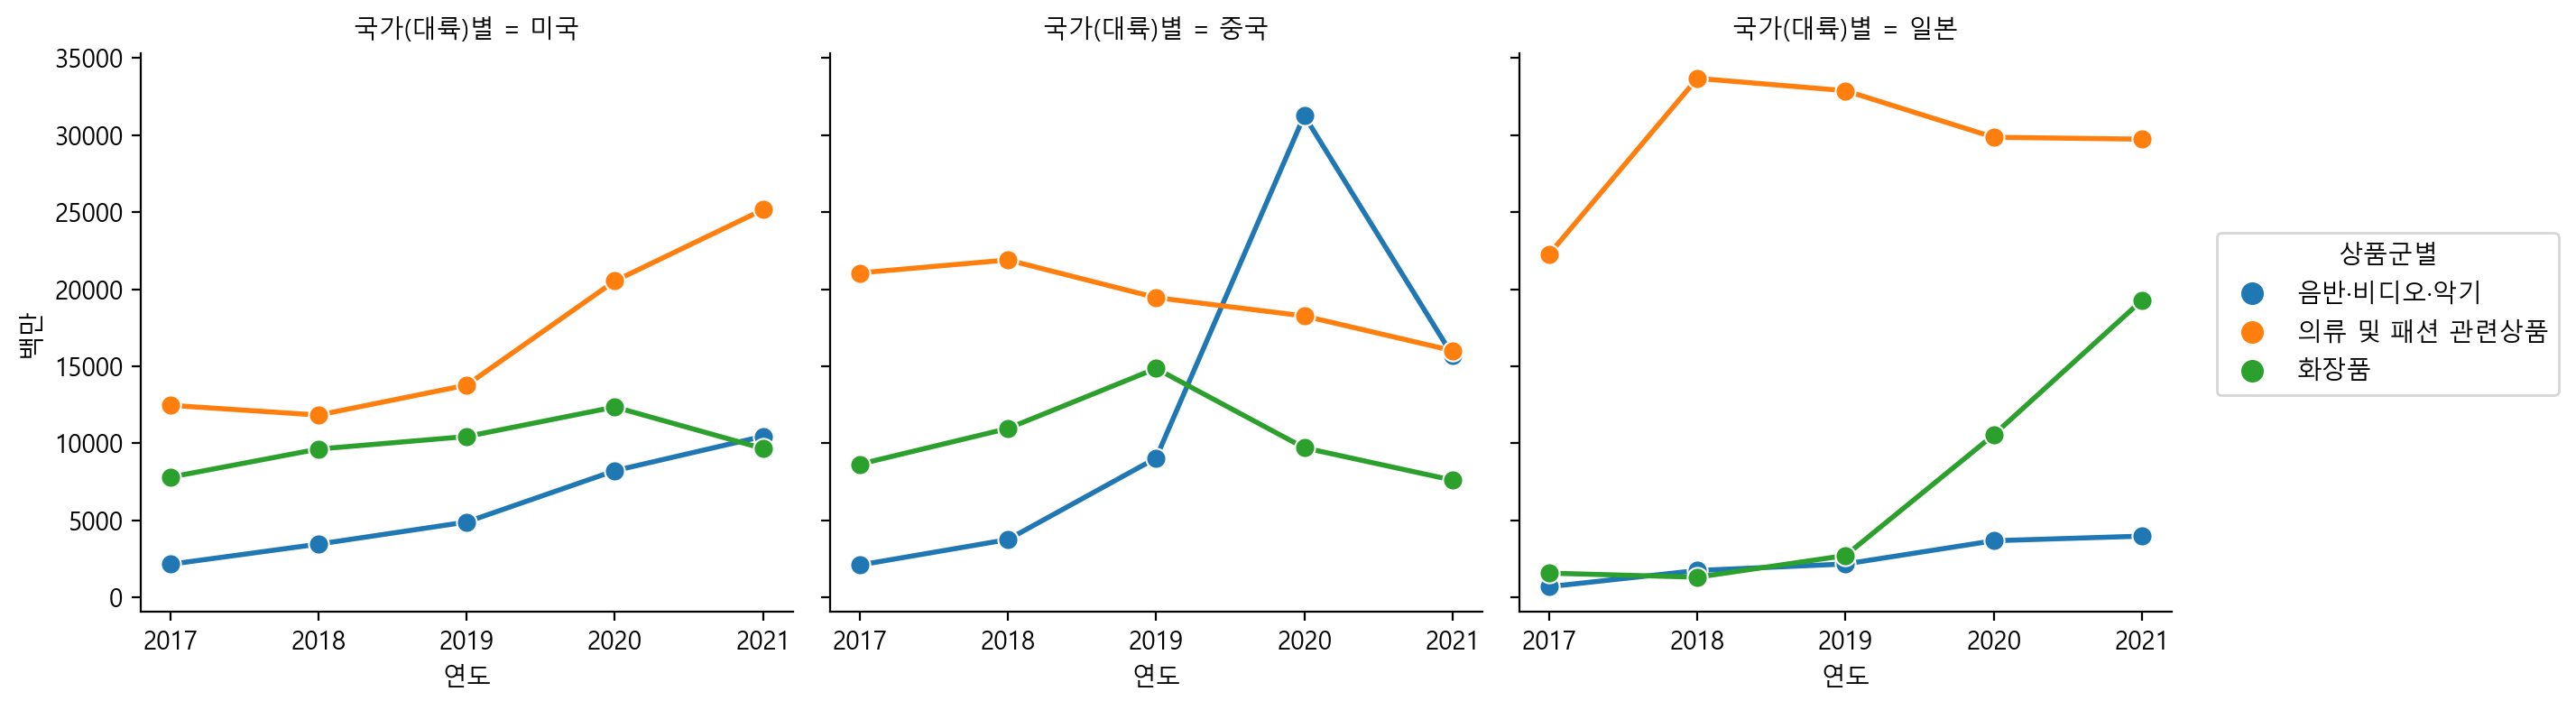

In [128]:
plt.figure(figsize=(10, 8))

g = sns.FacetGrid(df_main, col="국가(대륙)별", col_order=["미국", "중국", "일본"], height=4, aspect=1.2)

g.map(sns.lineplot, "연도", "백만", "상품군별", marker="o", ci = None, linewidth = 2, markersize=8)

handles, labels = g.axes.flat[0].get_legend_handles_labels()
new_handles = [plt.Line2D([], [], color=h.get_color(), marker='o', linestyle='None', markersize=8) for h in handles]

plt.legend(new_handles, labels, title="상품군별", bbox_to_anchor=(1.05, 0.7), loc='upper left')

g.set_titles("국가(대륙)별 = {col_name}")

plt.tight_layout()

plt.show()

# Q5. 
```
KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

1. 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
2. KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
3. 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
4. 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.
```

## 데이터 불러오기

In [185]:
df_pop = pd.read_csv("./data/서울시_행정구별_주민등록인구.csv")

df_pop

,행정구역(동읍면)별,항목,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,행정구역(동읍면)별,항목,계,계,계,계,계,계,계,계,계,계,계,계,계
1,종로구,총인구수 (명),168382,165207,160070,156993,154986,152737,154770,153065,151290,149384,144683,141379,139417
2,중구,총인구수 (명),133193,133360,130465,128065,125733,125249,125709,125725,126171,125240,122499,120437,121312
3,용산구,총인구수 (명),246501,243232,239740,235951,233342,230241,229161,228999,228670,230040,222953,218650,213151
4,성동구,총인구수 (명),300711,299604,299337,296086,297003,299259,304808,308221,300889,293556,285990,281000,277361
5,광진구,총인구수 (명),371936,371313,368927,363354,360369,357215,357703,355559,351350,346682,339996,337416,335554
6,동대문구,총인구수 (명),365486,363258,364273,363687,360153,355069,350647,348052,346194,342837,337400,336644,341149
7,중랑구,총인구수 (명),423706,419295,416798,418836,413909,411005,408226,403209,397015,394702,387350,385318,382155
8,성북구,총인구수 (명),485171,481857,476589,466706,459275,450355,444055,435868,442650,437153,430528,430397,425602
9,강북구,총인구수 (명),345054,343157,338707,335025,330873,327195,324479,319164,313954,308055,299182,293660,288113


## 데이터 전처리

In [186]:
# 첫 행 제거
df_pop = df_pop.drop(0, axis = 0)

# 항목 컬럼 제거
df_pop = df_pop.drop("항목", axis = 1)

In [187]:
# index 설정
df_pop = df_pop.set_index("행정구역(동읍면)별")

# data type 변경 및 단위 수정
year_list = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

for year in year_list:
    df_pop[year] = df_pop[year].astype(float)
    df_pop[year] = round(df_pop[year] / 1000, 0)
    
# 행렬 변환
df_pop = df_pop.T

In [188]:
df_pop

행정구역(동읍면)별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2011,168.0,133.0,247.0,301.0,372.0,365.0,424.0,485.0,345.0,366.0,...,569.0,427.0,243.0,397.0,401.0,526.0,434.0,566.0,682.0,495.0
2012,165.0,133.0,243.0,300.0,371.0,363.0,419.0,482.0,343.0,362.0,...,567.0,428.0,243.0,391.0,405.0,523.0,435.0,564.0,673.0,488.0
2013,160.0,130.0,240.0,299.0,369.0,364.0,417.0,477.0,339.0,359.0,...,569.0,425.0,241.0,386.0,411.0,518.0,442.0,564.0,668.0,483.0
2014,157.0,128.0,236.0,296.0,363.0,364.0,419.0,467.0,335.0,354.0,...,585.0,426.0,238.0,382.0,407.0,513.0,450.0,578.0,665.0,477.0
2015,155.0,126.0,233.0,297.0,360.0,360.0,414.0,459.0,331.0,351.0,...,589.0,422.0,236.0,379.0,401.0,510.0,447.0,576.0,660.0,459.0
2016,153.0,125.0,230.0,299.0,357.0,355.0,411.0,450.0,327.0,348.0,...,595.0,418.0,235.0,371.0,401.0,507.0,447.0,567.0,658.0,444.0
2017,155.0,126.0,229.0,305.0,358.0,351.0,408.0,444.0,324.0,344.0,...,602.0,411.0,235.0,369.0,396.0,503.0,441.0,556.0,664.0,436.0
2018,153.0,126.0,229.0,308.0,356.0,348.0,403.0,436.0,319.0,339.0,...,597.0,404.0,234.0,368.0,396.0,502.0,434.0,542.0,667.0,428.0
2019,151.0,126.0,229.0,301.0,351.0,346.0,397.0,443.0,314.0,333.0,...,592.0,407.0,233.0,368.0,396.0,500.0,431.0,545.0,676.0,436.0
2020,149.0,125.0,230.0,294.0,347.0,343.0,395.0,437.0,308.0,325.0,...,580.0,404.0,232.0,379.0,391.0,495.0,425.0,539.0,668.0,460.0


## 시각화

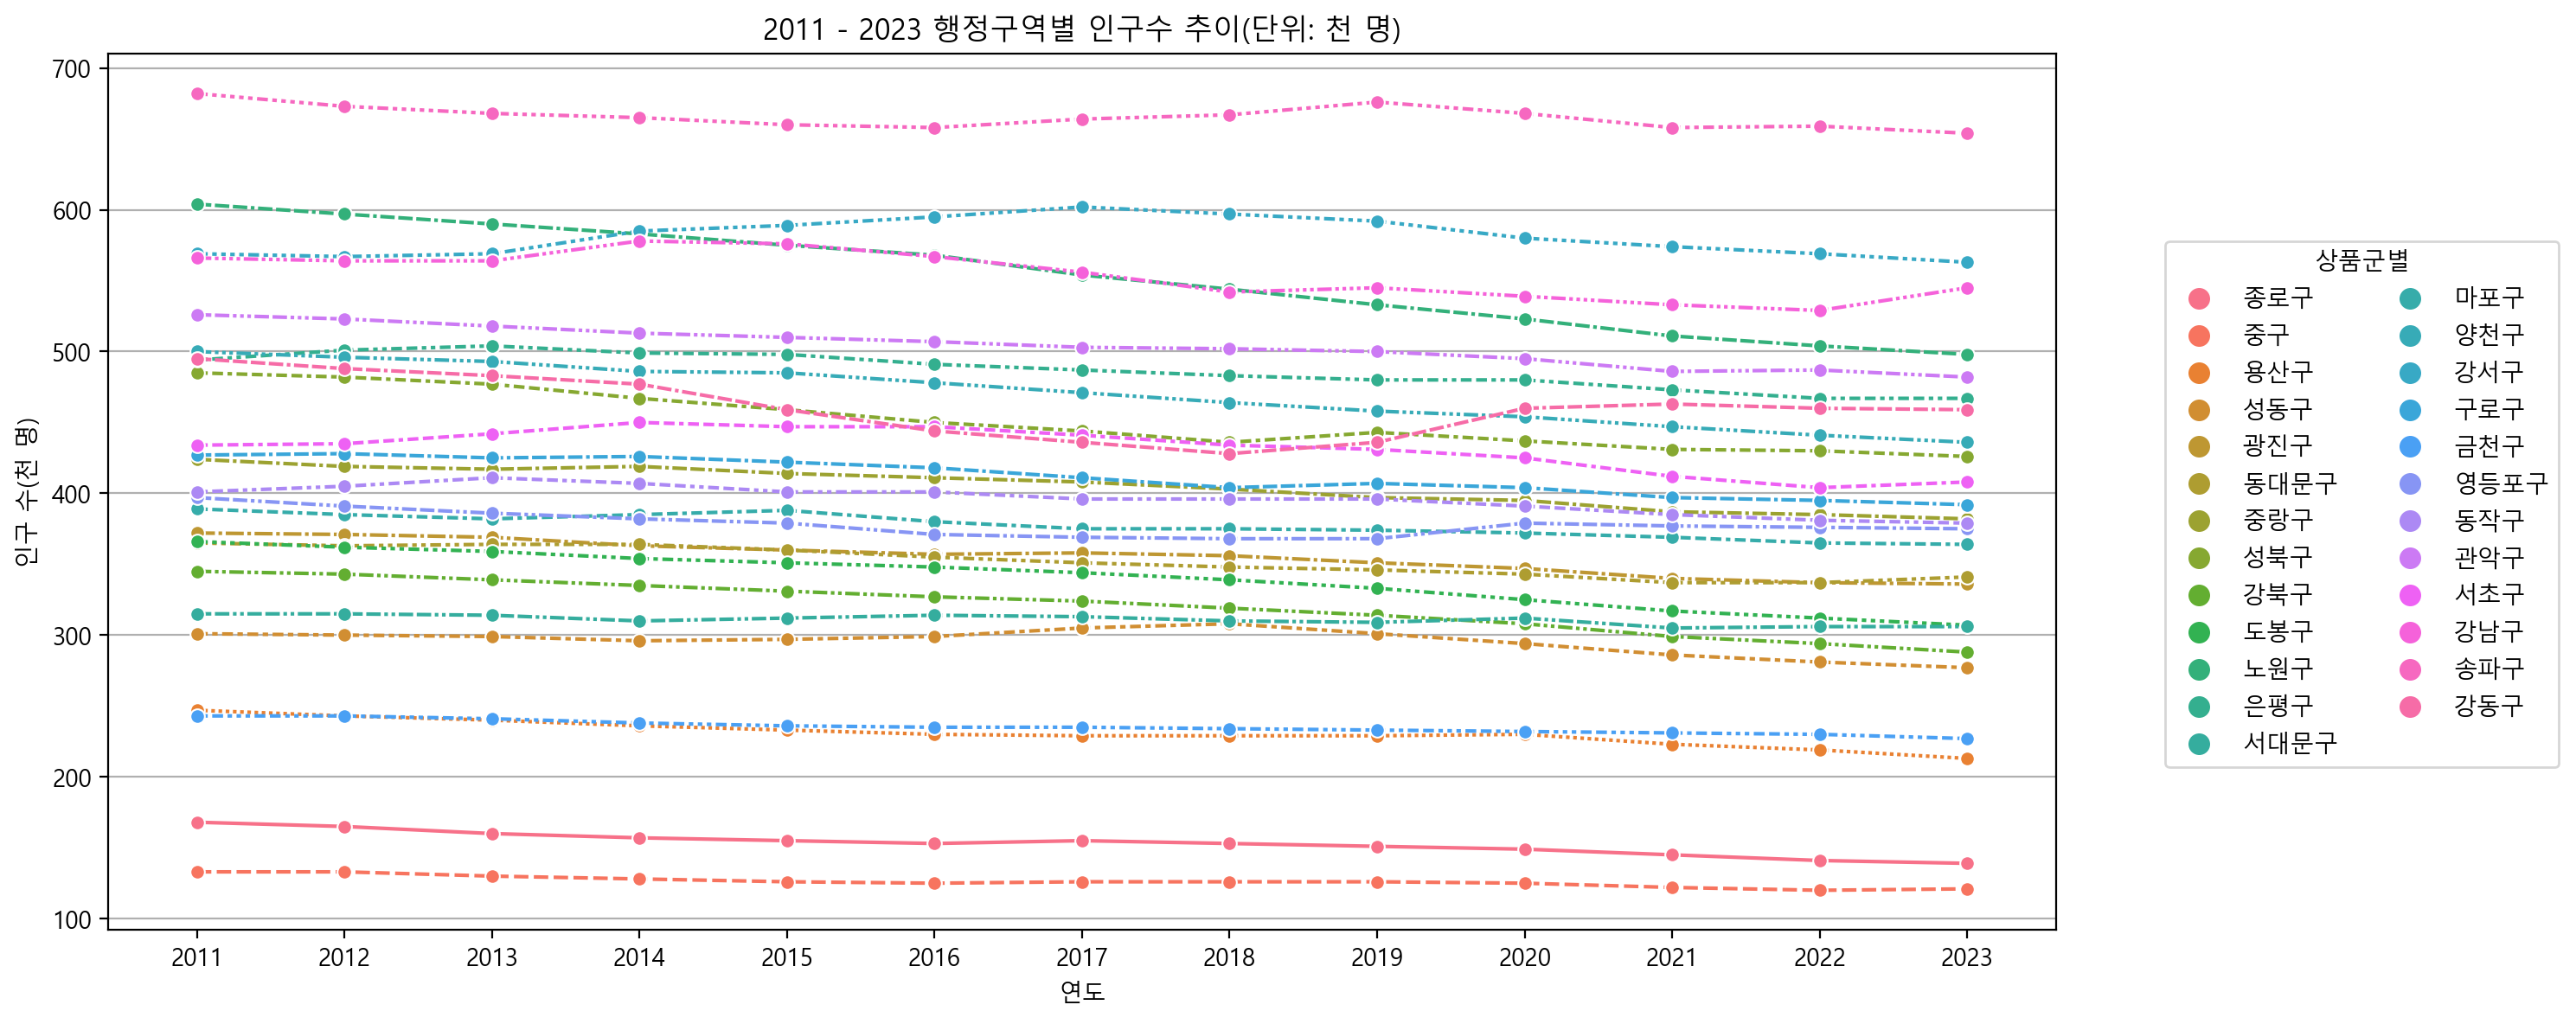

In [193]:
plt.figure(figsize=(15, 6))

ax = sns.lineplot(data = df_pop, marker = "o")

plt.grid(axis = "y")
plt.title("2011 - 2023 행정구역별 인구수 추이(단위: 천 명)")
plt.xlabel("연도")
plt.ylabel("인구 수(천 명)")

handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Line2D([], [], color=h.get_color(), marker='o', linestyle='None', markersize=8) for h in handles]

plt.legend(new_handles, labels, title="상품군별", bbox_to_anchor=(1.05, 0.8), loc='upper left', ncol = 2)

plt.tight_layout()
plt.show()